In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Data
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Building Model
import tensorflow as tf
from tensorflow.keras import layers

# Download Model
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/NLP Assignment/FinalProject/data/train.csv")
test = pd.read_csv(r"/content/drive/MyDrive/NLP Assignment/FinalProject/data/test.csv")

In [ ]:
data.head(3)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


In [ ]:
test.head(3)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...


In [ ]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [ ]:
data.shape, test.shape

((20800, 5), (5200, 4))

In [ ]:
def drop_col(data, columns_to_drop=["id", "author"]):
    data.drop(columns=columns_to_drop, inplace=True)
    return data

data = drop_col(data)
test = drop_col(test)


In [ ]:
data.head(2)

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0


In [ ]:
test.head(2)

,title,text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...


In [ ]:
data["title"].value_counts()

Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence              5
The Dark Agenda Behind Globalism And Open Borders                                                               5
Schools All Over America Are Closing On Election Day Due To Fears Of Violence                                   4
“If Trump Loses, I’m Grabbing My Musket”: Former Congressman Ready to Go Full Revolution                        4
Public vs. Media on War                                                                                         4
                                                                                                               ..
Report: Only 6% of Millennials Said Their Social Media Was a ’Completely True’ Depiction of Them - Breitbart    1
Hillary Clinton, Donald Trump, Iraq Inquiry: Your Wednesday Evening Briefing - The New York Times               1
Shall We Save Civilization, or Not? - American Herald Tribune                           

In [ ]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [ ]:
test.isnull().sum()

title    122
text       7
dtype: int64

In [ ]:
test[test["text"].isnull()]

,title,text
589,[Vidéo] Que trouve-t-on dans « Le Gorafi de l’...,NaN
626,Nous avons comparé les programmes d’Alain Jupp...,NaN
978,« J’y crois encore ! » par Alain Juppé en trai...,NaN
2257,Horoscope du 14 novembre 2016 >> Le Gorafi,NaN
2892,Une fan demande le remboursement de son tatoua...,NaN
4736,Révélations – François Fillon serait de droite...,NaN
5092,Des traces de vin rouge détectées dans le Beau...,NaN


In [ ]:
data[data["text"].isnull()]

,title,text,label
142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,1
573,Le top des recherches Google passe en top des ...,NaN,1
1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,1
1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,1
2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,1
2169,"#NDDL: Pour fêter l’autorisation des travaux, ...",NaN,1
2793,«Pourquoi je suis candidat à la présidentielle...,NaN,1
3329,GuinessBook : 100 millions d’Américains batten...,NaN,1
3729,Les Américains ne sont plus qu’à quelques heur...,NaN,1
4288,Hillary Clinton en 5 dates >> Le Gorafi,NaN,1


In [ ]:
def fill_data(data, fill_values={"title": "No Title", "text": "No text"}):
    data.fillna(value=fill_values, inplace=True)
    return data

data = fill_data(data)
test = fill_data(test)


In [ ]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
test.isnull().sum()

title    0
text     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20800 non-null  object
 1   text    20800 non-null  object
 2   label   20800 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 487.6+ KB


In [ ]:
data.head(2)

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0


In [ ]:
test.head(2)

,title,text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...


In [ ]:
def concatenate_columns(data, new_column_name="new_text", columns_to_concat=["title", "text"]):
    data = data.assign(**{new_column_name: data[columns_to_concat].fillna("").agg(" ".join, axis=1)})
    return data

data = concatenate_columns(data)
test = concatenate_columns(test)

In [ ]:
data.head(2)

,title,text,label,new_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."


In [ ]:
test.head(2)

,title,text,new_text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...


In [ ]:
punc = set(string.punctuation)
stop_words = set(stopwords.words("english"))

def processing_text(data):
    # Convert to lowercase
    data = data.lower()

    # Tokenize and filter out stopwords and punctuation
    words = word_tokenize(data)
    filtered_words = [word for word in words if word not in stop_words and word not in punc]

    # Remove non-alphabetic characters
    data = re.sub("[^a-z]", " ", " ".join(filtered_words))

    return data

In [ ]:
data["Final_text"] = data["new_text"].apply(processing_text)
test["Final_text"] = test["new_text"].apply(processing_text)

In [ ]:
data.head(5)

,title,text,label,new_text,Final_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...,house dem aide even see comey letter jason...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",flynn hillary clinton big woman campus breitba...
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...,truth might get fired truth might get fired oc...
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...,civilians killed single us airstrike identi...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...,iranian woman jailed fictional unpublished sto...


In [ ]:
test.head(5)

,title,text,new_text,Final_text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse...",specter trump loosens tongues purse strings si...
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,russian warships ready strike terrorists near ...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...,nodapl native american leaders vow stay winter...
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ...",tim tebow attempt another comeback time baseba...
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) 42 mins ago 1 ...,keiser report meme wars e mins ago vie...


In [ ]:
def drop_extra_col(data):
    for col in ["title", "text", "new_text"]: data.drop(col, axis=1, inplace=True)

    return data

data = drop_extra_col(data)
test = drop_extra_col(test)

In [ ]:
data.head(5)

,label,Final_text
0,1,house dem aide even see comey letter jason...
1,0,flynn hillary clinton big woman campus breitba...
2,1,truth might get fired truth might get fired oc...
3,1,civilians killed single us airstrike identi...
4,1,iranian woman jailed fictional unpublished sto...


In [ ]:
test.head(5)

,Final_text
0,specter trump loosens tongues purse strings si...
1,russian warships ready strike terrorists near ...
2,nodapl native american leaders vow stay winter...
3,tim tebow attempt another comeback time baseba...
4,keiser report meme wars e mins ago vie...


In [ ]:
X = data["Final_text"]
Y = data["label"]

In [ ]:
label = to_categorical(Y, 2)

In [ ]:
label

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
Max_vocab_size = 20000
max_sequance_lenght = 100
Embeding_dim = 100

In [ ]:
tokenize = Tokenizer(oov_token="<OOV>")
tokenize.fit_on_texts(X)
word_idx = tokenize.word_index

text2seq = tokenize.texts_to_sequences(X)

# pad_seq = pad_sequences(text2seq, maxlen=150, padding="pre", truncating="pre")

pad_seq = pad_sequences(text2seq, padding="pre", truncating="pre")


print("The Padding Sequance Shape is  --> ", pad_seq.shape)

The Padding Sequance Shape is  -->  (20800, 12177)


In [ ]:
input_length = max(len(seq) for seq in text2seq)

vocabulary_size = len(word_idx) + 1

In [ ]:
input_length, vocabulary_size

(12177, 148609)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pad_seq, label, train_size=0.7, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = tf.keras.models.Sequential(
    [
        Embedding(vocabulary_size, 150, input_length=input_length),
        GlobalAveragePooling1D(),
        Dense(128, activation="relu"),
        Dense(24, activation="relu"),
        Dense(2, activation="softmax")
    ])

model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12177, 150)        22291350  
                                                                 
 global_average_pooling1d (  (None, 150)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 128)               19328     
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
 dense_2 (Dense)             (None, 2)                 50        
                                                                 
Total params: 22313824 (85.12 MB)
Trainable params: 22313824 (85.12 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

Epoch 1/10
455/455 - 421s - loss: 0.6721 - accuracy: 0.5665 - val_loss: 0.5283 - val_accuracy: 0.7988 - 421s/epoch - 925ms/step
Epoch 2/10
455/455 - 424s - loss: 0.3035 - accuracy: 0.8760 - val_loss: 0.2097 - val_accuracy: 0.9383 - 424s/epoch - 933ms/step
Epoch 3/10
455/455 - 424s - loss: 0.1542 - accuracy: 0.9434 - val_loss: 0.1399 - val_accuracy: 0.9548 - 424s/epoch - 931ms/step
Epoch 4/10
455/455 - 428s - loss: 0.0911 - accuracy: 0.9699 - val_loss: 0.1351 - val_accuracy: 0.9593 - 428s/epoch - 940ms/step
Epoch 5/10
455/455 - 419s - loss: 0.0633 - accuracy: 0.9795 - val_loss: 0.1035 - val_accuracy: 0.9667 - 419s/epoch - 921ms/step
Epoch 6/10
455/455 - 471s - loss: 0.0538 - accuracy: 0.9813 - val_loss: 0.1116 - val_accuracy: 0.9665 - 471s/epoch - 1s/step
Epoch 7/10
455/455 - 458s - loss: 0.0321 - accuracy: 0.9893 - val_loss: 0.1031 - val_accuracy: 0.9689 - 458s/epoch - 1s/step
Epoch 8/10
455/455 - 450s - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.1041 - val_accuracy: 0.9702 - 450s/e

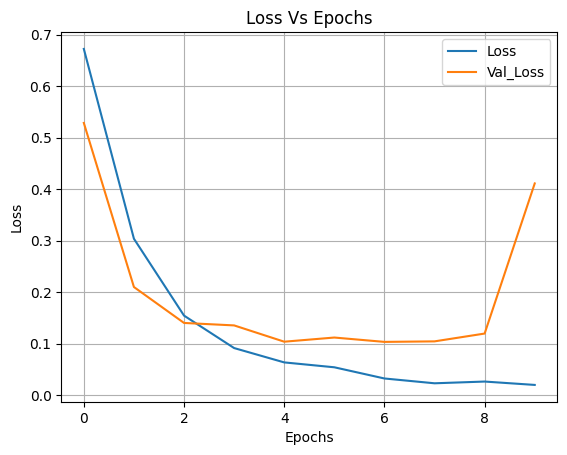

In [ ]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

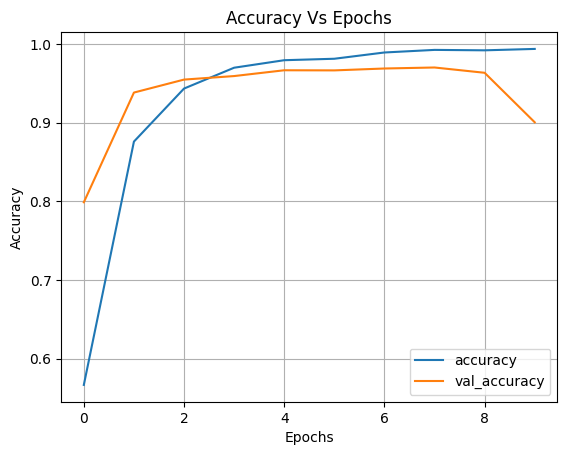

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [ ]:
test.head(4)

,Final_text
0,specter trump loosens tongues purse strings si...
1,russian warships ready strike terrorists near ...
2,nodapl native american leaders vow stay winter...
3,tim tebow attempt another comeback time baseba...


In [ ]:
tokenize.fit_on_texts(test["Final_text"])
word_idx = tokenize.word_index

text2seq = tokenize.texts_to_sequences(test["Final_text"])

pad_seq = pad_sequences(text2seq, maxlen=150, padding="pre", truncating="pre")

pad_seq_test = pad_sequences(text2seq, padding="pre", truncating="pre", maxlen=12815)


print("The Padding Sequance Shape is  --> ", pad_seq_test.shape)

The Padding Sequance Shape is  -->  (5200, 12815)
